In [4]:
# scalability evaluation

import os
import re
from openai import OpenAI

client = OpenAI(base_url='https://api.chsdw.top/v1',api_key='sk-BLiQFlQiGv5fkGql58C97c9cF6Cd406bB48cF6E48b55077a')

example_2 = """
data: [ {'Time': 'Oct 2022', 'Inflation rate': 7.7}, 
        {'Time': 'Nov 2022', 'Inflation rate': 7.1}, 
        {'Time': 'Dec 2022', 'Inflation rate': 6.5}, 
        {'Time': 'Jan 2023', 'Inflation rate': 6.4}, 
        {'Time': 'Feb 2023', 'Inflation rate': 6.0}, 
        {'Time': 'Mar 2023', 'Inflation rate': 5.0}, 
        {'Time': 'Apr 2023', 'Inflation rate': 4.9}, 
        {'Time': 'May 2023', 'Inflation rate': 4.1}, 
        {'Time': 'Jun 2023', 'Inflation rate': 3.0}, 
        {'Time': 'Jul 2023', 'Inflation rate': 3.2}]
text: ["Annual inflation rate falls since October 2022 and reaches 3.2% in July 2023."]
result: [{"ObjectName":["Annual inflation rate"],"DataName":"Inflation rate","Position":[{"Begin":[0,1],"End":[9,1]}],"Trend":"fall","Num":None,"Text":"Annual inflation rate falls since October 2022"},
        {"ObjectName":["Annual inflation rate"],"DataName":"Inflation rate","Position":[{"Begin":[9,1],"End":[9,1]}],"Trend":None,"Num": [3.2],"Text":"reaches 3.25% in July 2023"}]
reason: "The column 'Inflation rate' corresponds to the 'Annual inflation rate' in the text. The annual inflation rate falls since October 2022 to July 2023, which corresponds the row 0, 'Oct 2022' and the row 9 'Jul 2023'. The value are shown in column 1, so the trend corresponds to begin position [0,1] and end position [9,1]. The number 3.2% correspond to the position [9,1]."
"""

example = """
data: [{'Position':'United Kingdom','Billions of dollars': 59.9},
	    {'Position':'Netherlands','Billions of dollars': 43.1},
        {'Position':'France','Billions of dollars': 35.3},
	    {'Position':'Canada','Billions of dollars': 30},
        {'Position':'Japan','Billions of dollars': 29.6}]
text: ["Investment by British investors accounted for 18 percent of new foreign direct investment expenditures. The Netherlands ($43.1 billion) was the second-largest investing country, followed by France ($35.3 billion)."]
result: [{"ObjectName":["Netherlands"],"DataName":"Billions of dollars","Position":[{"Begin":[1,1],"End":[1,1]}],"Trend":"None","Num":[43.1],"Text":"The Netherlands ($43.1 billion)"},
        {"ObjectName":["France"],"DataName":"Billions of dollars","Position":[{"Begin":[2,1],"End":[2,1]}],"Trend":"None","Num":[35.3],"Text":"France ($35.3 billion)"}]
reason: "The corresponding value for object "Netherlands" is "43.1", and its shortest descriptive phrase is "The Netherlands ($43.1 billion)". The corresponding value for object "France" is "35.3" and its shortest descriptive phrase is "France ($35.3 billion)
"""


response = client.chat.completions.create(
    model="gpt-3.5-turbo-16k",
    messages=[
        {"role": "system", "content": "you are an expert in text-data binding. the input is a data table and corresponding text. you should return the binding result as the following examples show. especially, you should focus on the corresponding position of trend and numerical."},
        {"role": "system", "content": example_2},
        {"role": "user", "content": test_data},    
    ],
    temperature=0.1
)
print(response.choices[0].message.content)



Sure, let’s process the data and corresponding text as per the given examples.

**Data:**
```json
[
    {"Time": "Jan 2022", "Sales": 150},
    {"Time": "Feb 2022", "Sales": 180},
    {"Time": "Mar 2022", "Sales": 170},
    {"Time": "Apr 2022", "Sales": 200},
    {"Time": "May 2022", "Sales": 220},
    {"Time": "Jun 2022", "Sales": 210},
    {"Time": "Jul 2022", "Sales": 230},
    {"Time": "Aug 2022", "Sales": 240},
    {"Time": "Sep 2022", "Sales": 250},
    {"Time": "Oct 2022", "Sales": 260}
]
```

**Text:**
```plaintext
"Sales have been increasing steadily since January 2022 and peaked at 260 in October 2022."
```

**Binding Result:**
```json
[
    {
        "ObjectName": ["Sales"],
        "DataName": "Sales",
        "Position": [{"Begin":[0,1],"End":[9,1]}],
        "Trend": "increase",
        "Num": None,
        "Text": "Sales have been increasing steadily since January 2022"
    },
    {
        "ObjectName": ["Sales"],
        "DataName": "Sales",
        "Position": [{"Begi

In [7]:
import pandas as pd

data = pd.read_csv('./scalability file.csv')
part_data = data[["Time","Monthly GDP","Unemployment Rate"]]
part_data = part_data.iloc[9:19] # 9-19是原始内容
data_list = part_data.to_dict(orient='records')
data_str = str(data_list)

test_text = """
text: ["The US Monthly GDP continue to grow from January 22 to October 22, and reaches 26.30 on October."]
"""
test_data = """data: """ + data_str + test_text
print(test_data)

# original data and text
# text: ["The US Monthly GDP continue to grow from January 22 to October 22, and reaches 26.30 on October."]
# data: [{'Time': 'Jan 2022', 'Monthly GDP': 24.86}, 
        # {'Time': 'Feb 2022', 'Monthly GDP': 25.01}, 
        # {'Time': 'Mar 2022', 'Monthly GDP': 25.21}, 
        # {'Time': 'Apr 2022', 'Monthly GDP': 25.29}, 
        # {'Time': 'May 2022', 'Monthly GDP': 25.54}, 
        # {'Time': 'Jun 2022', 'Monthly GDP': 25.78}, 
        # {'Time': 'Jul 2022', 'Monthly GDP': 25.89}, 
        # {'Time': 'Aug 2022', 'Monthly GDP': 26.12},
        # {'Time': 'Sep 2022', 'Monthly GDP': 26.13}, 
        # {'Time': 'Oct 2022', 'Monthly GDP': 26.30}]

# 前后增加10个词
# In the middle of a busy day, the US Monthly GDP continue to grow from January 22 to October 22, and reaches 26.30 on October, despite various challenges and unexpected events.
# 前后增加20个词
# Amidst the chatter and buzz of the city, it was noted that the US Monthly GDP continue to grow from January 22 to October 22, and reaches 26.30 on October. This happened while people were focusing on different aspects of life, from sports to entertainment, ignoring the economic indicators.
# 前后30
# On a sunny afternoon, with people going about their daily routines and children playing in the parks, it was announced that the US Monthly GDP continue to grow from January 22 to October 22, and reaches 26.30 on October. Interestingly, this occurred while everyone was busy with the holiday preparations and festive events, showing little attention to the economic fluctuations.
# 前后40
# In a bustling city filled with the sounds of traffic and street vendors, an interesting piece of news came through that the US Monthly GDP continue to grow from January 22 to October 22, and reaches 26.30 on October. Amidst the daily grind and people's focus on personal activities such as shopping, dining, and attending social events, this economic growth seemed to happen almost unnoticed by the general public, who were more concerned with their immediate surroundings and social engagements.
# 前后50 
# As the day unfolded with the usual hustle and bustle of urban life, where office workers were rushing to meetings and children were eagerly heading to school, it was reported that the US Monthly GDP continue to grow from January 22 to October 22, and reaches 26.30 on October. This growth was observed while people were preoccupied with a myriad of activities, including planning vacations, attending family gatherings, participating in community events, and engaging in various hobbies. It seems that the economic indicators often play a silent role in the background of our busy lives, unnoticed by many who are absorbed in their personal and social pursuits.

data: [{'Time': 'Jan 2022', 'Monthly GDP': 24.86, 'Unemployment Rate': 4.0}, {'Time': 'Feb 2022', 'Monthly GDP': 25.01, 'Unemployment Rate': 3.8}, {'Time': 'Mar 2022', 'Monthly GDP': 25.29, 'Unemployment Rate': 3.6}, {'Time': 'Apr 2022', 'Monthly GDP': 25.54, 'Unemployment Rate': 3.7}, {'Time': 'May 2022', 'Monthly GDP': 25.78, 'Unemployment Rate': 3.6}, {'Time': 'Jun 2022', 'Monthly GDP': 25.89, 'Unemployment Rate': 3.6}, {'Time': 'Jul 2022', 'Monthly GDP': 26.12, 'Unemployment Rate': 3.5}, {'Time': 'Aug 2022', 'Monthly GDP': 26.13, 'Unemployment Rate': 3.6}, {'Time': 'Sep 2022', 'Monthly GDP': 26.3, 'Unemployment Rate': 3.5}, {'Time': 'Oct 2022', 'Monthly GDP': 26.46, 'Unemployment Rate': 3.6}]
text: ["The US Monthly GDP continue to grow from January 22 to October 22, and reaches 26.30 on October."]



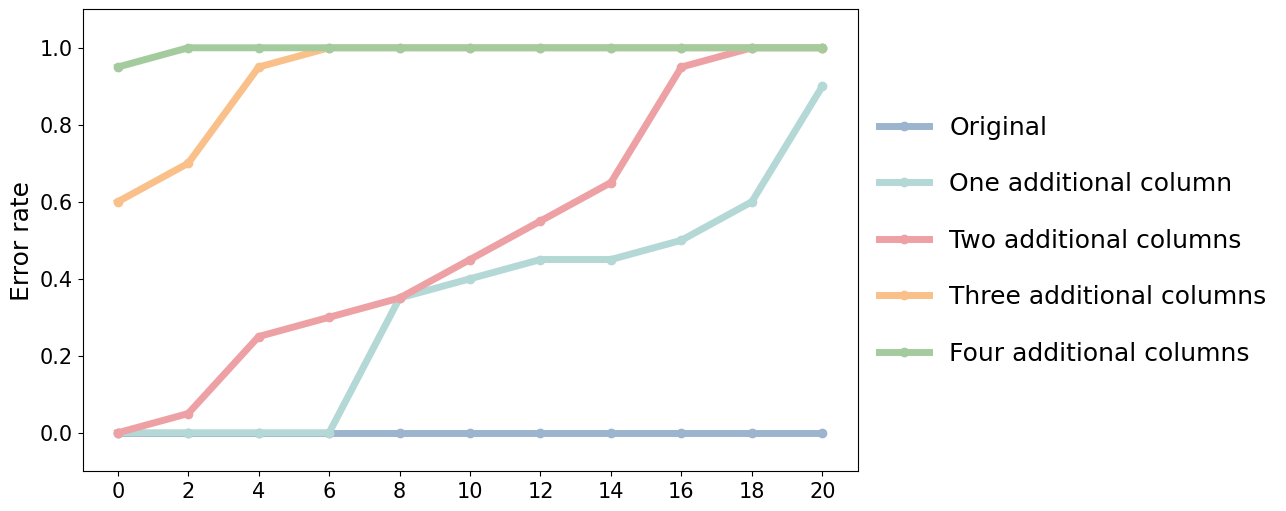

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

x_axix = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
ori = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
col_1 = [0,0, 0, 0, 0.35, 0.4, 0.45,0.45,0.5,0.6,0.9]
col_2 = [0,0.05,0.25,0.3,0.35,0.45,0.55,0.65,0.95,1,1]
col_3 = [0.6,0.7,0.95,1,1,1,1,1,1,1,1]
col_4 = [0.95,1,1,1,1,1,1,1,1,1,1]

plt.figure(figsize=(10,6))

plt.plot(x_axix, ori, color='#9DB4CE', linewidth = 5, marker='o',label='Original')
plt.plot(x_axix, col_1, color='#b3d8d5', linewidth = 5,marker='o',label='One additional column')
plt.plot(x_axix, col_2,  color='#eda1a4',linewidth = 5, marker='o',label='Two additional columns')
plt.plot(x_axix, col_3, color='#f9c08a', linewidth = 5,marker='o',label='Three additional columns')
plt.plot(x_axix, col_4,  color='#a4cb9e',linewidth = 5, marker='o',label='Four additional columns')


plt.ylim(-0.1,1.1)
plt.xticks(x_axix, fontsize=15)
plt.yticks(fontsize=15)

plt.legend(bbox_to_anchor=(1.015, 0.5), loc='center left', borderaxespad=0., fontsize=18, frameon=False, labelspacing=1.3)
# plt.xlabel('The number of rows increased', fontsize=14)
plt.ylabel('Error rate', fontsize=18)
plt.show()

In [16]:
# 先补数据到两百行
import pandas as pd
from datetime import datetime
import numpy as np
from dateutil.relativedelta import relativedelta

data = pd.read_csv('./scalability file.csv')
columns = ['Time','Inflation Rate','Trade Balance','Monthly GDP','Unemployment Rate','Trade Interest']
data = data[columns]
# print(data['Time'])
data['Time'] = data['Time'].str.strip()
data['Time'] = pd.to_datetime(data['Time'], format='%b-%y')
# 获取最早时间
earliest_time = data['Time'].min()

additional_rows = 200 - len(data)
new_dates = [earliest_time - relativedelta(months=i) for i in range(additional_rows,0,-1)]

new_time_series = pd.Series(new_dates)
new_time_series = new_time_series.dt.strftime('%b-%y')

data['Time'] = data['Time'].dt.strftime('%b-%y')

# 创建新的数据框，包含扩展的时间列
new_data = pd.DataFrame({'Time': new_time_series})


# 为每列数据生成随机数补充空白值
for column in ['Inflation Rate', 'Trade Balance', 'Monthly GDP', 'Unemployment Rate', 'Trade Interest']:
    min_value = data[column].min()
    max_value = data[column].max()
    new_data[column] = np.random.uniform(min_value, max_value, size=additional_rows).round(2)

# 合并原始数据和新数据
expanded_df = pd.concat([new_data, data], ignore_index=True).reset_index(drop=True)

print(expanded_df.head())
print(expanded_df['Time'].iloc[-1])

     Time  Inflation Rate  Trade Balance  Monthly GDP  Unemployment Rate  \
0  Jan-07            6.17         100.87        24.61               5.26   
1  Feb-07            5.73          81.92        23.28               3.45   
2  Mar-07            7.89          71.42        26.15               5.86   
3  Apr-07            8.23          61.06        25.55               4.43   
4  May-07            7.78          71.15        25.36               4.78   

   Trade Interest  
0            4.16  
1            1.47  
2            3.98  
3            3.08  
4            3.79  
Aug-23


In [17]:
expanded_df.to_csv('./scalability_200.csv')

In [93]:
## 很好！根据新的200行数据，只关注 value 的变化 测试20个
import os
import re
from openai import OpenAI

client = OpenAI(base_url='https://api.chsdw.top/v1',api_key='sk-BLiQFlQiGv5fkGql58C97c9cF6Cd406bB48cF6E48b55077a')

data = pd.read_csv('./scalability_200.csv')
part_data = data[["Time","Monthly GDP"]] # 最中间的是 monthly GDP

part_data = part_data.iloc[0:139] # 共200行的话，内部是90-109 
data_list = part_data.to_dict(orient='records')
data_str = str(data_list)

test_text = """
text: ["The US Monthly GDP reaches 24.81 on 8-Jun."]
"""
# text: ["The US Monthly GDP reaches 24.13 on 15-Mar."]
test_data = """data: """ + data_str + test_text

example_0 = """
data: [{'Position':'United Kingdom','Billions of dollars': 59.9},
	    {'Position':'Netherlands','Billions of dollars': 43.1},
        {'Position':'France','Billions of dollars': 35.3},
	    {'Position':'Canada','Billions of dollars': 30},
        {'Position':'Japan','Billions of dollars': 29.6}]
text: ["The Netherlands ($43.1 billion) was the second-largest investing country."]
result: [{"ObjectName":["Netherlands"],"DataName":"Billions of dollars","Position":[{"Begin":[1,1],"End":[1,1]}],"Trend":"None","Num":[43.1],"Text":"The Netherlands ($43.1 billion)"}]
reason: "The corresponding value for object "Netherlands" is "43.1", and it corresponds to the value 43.1 located in row 1, column 1. The column 'Position' is the column 0. The column 'Billions of dollars' is the column 1. 
"""

example_1 = """ 
data:  [{'Time':'2017/1/1','Mini- and subcompact size':'0.61','Compact size':'0.35', 'Midsize to large':'0.04'},
	{'Time':'2018/1/1','Mini- and subcompact size':'0.49','Compact size':'0.41', 'Midsize to large':'0.10'},
	{'Time':'2019/1/1','Mini- and subcompact size':'0.33','Compact size':'0.54', 'Midsize to large':'0.13'},
	{'Time':'2020/1/1','Mini- and subcompact size':'0.35','Compact size':'0.33', 'Midsize to large':'0.32'},
	{'Time':'2021/1/1','Mini- and subcompact size':'0.37','Compact size':'0.28', 'Midsize to large':'0.35'},
	{'Time':'2022/1/1','Mini- and subcompact size':'0.37','Compact size':'0.31', 'Midsize to large':'0.32'},
	{'Time':'2023/1/1','Mini- and subcompact size':'0.30','Compact size':'0.30', 'Midsize to large':'0.40'}]
text: ["The sale rate of Compact-size cars in 2021/1/1 is 0.28."]
result: [{"ObjectName":["Compact-size cars"],"DataName":"Compact size","Position":[{"Begin":[4,2],"End":[4,2]}],"Trend":"None","Num":[0.28],"Text":"The sale rate of Compact-size cars in 2021/1/1 is 0.28."}]
reason: "The column 'Compact size' corresponds to 'Compact-size cars' in the text, which is the second column. The column 'Time' is column 0, column 'Mini- and subcompact size' is column 1, column 'Compact size' is column 2, column 'Midsize to large' is column 3. The corresponding value for object "Compact-size cars" is "0.28", and this value is located in row 4, column 2.
"""

example_2 = """
data: [{'Time': 'Oct 2022', 'Inflation rate': 7.7}, 
        {'Time': 'Nov 2022', 'Inflation rate': 7.1}, 
        {'Time': 'Dec 2022', 'Inflation rate': 6.5}, 
        {'Time': 'Jan 2023', 'Inflation rate': 6.4}, 
        {'Time': 'Feb 2023', 'Inflation rate': 6.0}, 
        {'Time': 'Mar 2023', 'Inflation rate': 5.0}, 
        {'Time': 'Apr 2023', 'Inflation rate': 4.9}, 
        {'Time': 'May 2023', 'Inflation rate': 4.1}, 
        {'Time': 'Jun 2023', 'Inflation rate': 3.0}, 
        {'Time': 'Jul 2023', 'Inflation rate': 3.2}]
text: ["Annual inflation rate reaches 4.1% in May 2023."]
result: [{"ObjectName":["Annual inflation rate"],"DataName":"Inflation rate","Position":[{"Begin":[7,1],"End":[7,1]}],"Trend":None,"Num": [4.1],"Text":"reaches 4.1% in July 2023"}]
reason: "The column 'Inflation rate' corresponds to the 'Annual inflation rate' in the text. The column 'Time' is column 0, and column 'Inflation rate' is column 1. The value 4.1 correspond to the position [7,1] meaning row 7 and column 1."
"""

response = client.chat.completions.create(
    model="gpt-3.5-turbo-16k",
    messages=[
        {"role": "system", "content": "you are an expert in text-data binding. the input is a data table and corresponding text. you should return the binding result as the following examples show. especially, you should focus on the specific position of the num. The position contains the corresponding row, and the corresponding column. The beginning index of both row and column is 0."},
        {"role": "system", "content": example_0},
        {"role": "system", "content": example_1},
        {"role": "system", "content": example_2},
        {"role": "user", "content": test_data},    
    ],
    temperature=0.1
)
print(response.choices[0].message.content)

# print(part_data)


result: [{"ObjectName":["US Monthly GDP"],"DataName":"Monthly GDP","Position":[{"Begin":[15,2],"End":[15,2]}],"Trend":"None","Num":[24.81],"Text":"reaches 24.81 on 8-Jun."}]
reason: "The text references the 'US Monthly GDP' which corresponds to the 'Monthly GDP' column in the data. The specific value mentioned is '24.81', and it is located in the row corresponding to '8-Jun', which is the 15th row in the data. The 'Monthly GDP' column is the second column, hence the position [15,2] with the beginning and end indices both set to 2, as the indices start from 0."
